<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Phyton_kriring: Fitting 1D variogram </font>
</div>

- **Fecha**: 2022/11/11
        
- **Objetivos**: Test fitting 1D variogram 

- **Descripción** Tutorial for determining how it works

- **Referencias**: -

- **Autores**: 
    - Luis Miguel Sánchez Brea

In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import numpy as np

np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

In [21]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.dpi'] = 100

In [22]:
from phyton_kriging import np, plt

from phyton_kriging.variogram_1D import experimental, theoretical, fitting

# Experimental variogram 

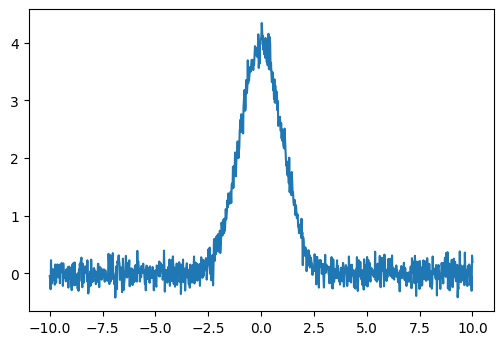

In [23]:
sc_initial = .15

x = np.linspace(-10, 10, 1000)
y = 4 * np.exp(-x**2 / (2 * 1**2)) + sc_initial * np.random.randn(len(x))

i_points = np.arange(0, 250)

plt.plot(x, y)

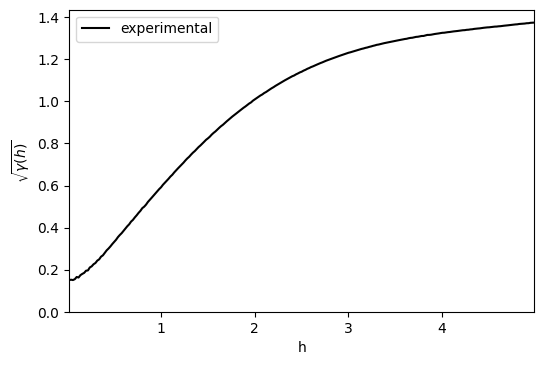

In [24]:
var_exp = experimental(x, y)
var_exp.compute(i_points)
var_exp.draw()


# Optimizacion por PSO

In [25]:
fitting1 = fitting(type='gauss', var_exp=var_exp)


In [26]:
fitting1.types()

constant
gauss
exponential
spherical
cubic
lineal
cuadratico


In [27]:
cost, var_final, optimizer = fitting1.execute()


2023-09-15 17:20:12,490 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.6, 'w': 0.9}
pyswarms.single.global_best:   9%|▉         |18/200, best_cost=0.0417

pyswarms.single.global_best: 100%|██████████|200/200, best_cost=0.015 
2023-09-15 17:20:14,805 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.014993358173075916, best pos: [0.1868 1.8234 2.3037]


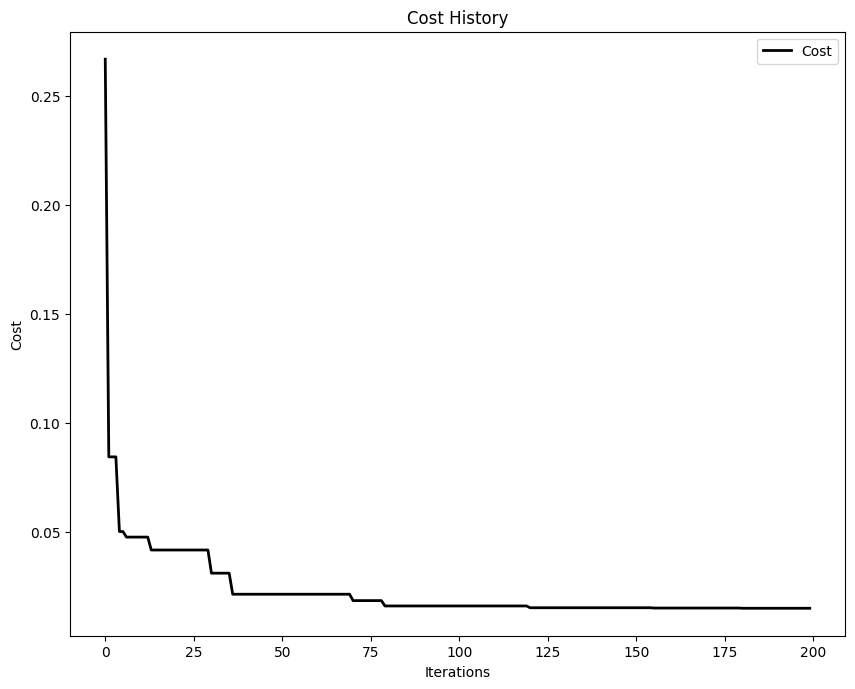

In [28]:
fitting1.draw_history()


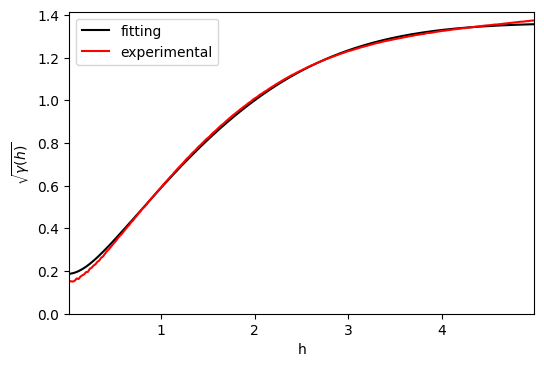

In [29]:
fitting1.draw_fitting('sqrt')

In [30]:
print(fitting1.param_final)

[0.1868 1.8234 2.3037]


In [31]:
print(cost)

0.014993358173075916


In [32]:
print(var_final)

[0.1868 1.8234 2.3037 2.    ]


In [33]:
for i in fitting1.pso_params:
    print("{}: {}".format(i, fitting1.pso_params[i]))

bounds: (array([0, 0, 0]), array([ 2,  5, 20]))
options: {'c1': 0.5, 'c2': 0.6, 'w': 0.9}
num_transitions: 3
num_iters: 200
num_particles: 100
